In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn import metrics

data_ch = pd.read_csv('../data/raw/601988.SH.csv')
data_google_train = pd.read_csv('../data/raw/Google_Stock_Price_Train.csv')
data_google_test = pd.read_csv('../data/raw/Google_Stock_Price_Test.csv') 

data_ch.index = pd.to_datetime(data_ch['trade_date'], format='%Y%m%d') 
data_google_train.index = pd.to_datetime(data_google_train['Date'],format='%m/%d/%Y')
data_google_test.index = pd.to_datetime(data_google_test['Date'],format='%m/%d/%Y')

In [20]:
data_ch = data_ch.drop(['ts_code','trade_date'], axis=1)
data_ch = pd.DataFrame(data_ch,dtype=np.float64)
ch_train = data_ch.loc['2007-01-04':'2021-06-21', :]
ch_test  = data_ch.loc['2021-06-22':, :]

In [21]:
ch_train.tail()

,open,high,low,close,pre_close,change,pct_chg,vol,amount,turnover_rate,volume_ratio,pe,pb,ps,total_share,float_share,free_share,total_mv,circ_mv
trade_date,,,,,,,,,,,,,,,,,,,
2021-06-15,3.08,3.09,3.07,3.07,3.08,-0.01,-0.3247,1694356.68,521533.748,0.0804,0.77,4.6859,0.5158,1.5981,2.943878e+07,2.107655e+07,2.049396e+06,9.037705e+07,6.470501e+07
2021-06-16,3.07,3.10,3.07,3.09,3.07,0.02,0.6515,1803827.62,556470.685,0.0856,0.90,4.7164,0.5192,1.6085,2.943878e+07,2.107655e+07,2.049396e+06,9.096583e+07,6.512654e+07
2021-06-17,3.08,3.10,3.08,3.08,3.09,-0.01,-0.3236,1309839.80,404524.624,0.0621,0.67,4.7012,0.5175,1.6033,2.943878e+07,2.107655e+07,2.049396e+06,9.067144e+07,6.491578e+07
2021-06-18,3.08,3.09,3.06,3.06,3.08,-0.02,-0.6494,1639908.79,503875.697,0.0778,0.86,4.6706,0.5141,1.5929,2.943878e+07,2.107655e+07,2.049396e+06,9.008266e+07,6.449425e+07
2021-06-21,3.06,3.08,3.06,3.07,3.06,0.01,0.3268,1172562.34,359751.317,0.0556,0.65,4.6859,0.5158,1.5981,2.943878e+07,2.107655e+07,2.049396e+06,9.037705e+07,6.470501e+07


In [22]:
ch_test.head()

,open,high,low,close,pre_close,change,pct_chg,vol,amount,turnover_rate,volume_ratio,pe,pb,ps,total_share,float_share,free_share,total_mv,circ_mv
trade_date,,,,,,,,,,,,,,,,,,,
2021-06-22,3.07,3.08,3.06,3.07,3.07,0.00,0.0000,930629.26,285873.151,0.0442,0.61,4.6859,0.5158,1.5981,2.943878e+07,2.107655e+07,2.049396e+06,9.037705e+07,6.470501e+07
2021-06-23,3.07,3.08,3.06,3.07,3.07,0.00,0.0000,875408.11,268733.070,0.0415,0.64,4.6859,0.5158,1.5981,2.943878e+07,2.107655e+07,2.049396e+06,9.037705e+07,6.470501e+07
2021-06-24,3.07,3.08,3.06,3.07,3.07,0.00,0.0000,823244.26,252945.198,0.0391,0.69,4.6859,0.5158,1.5981,2.943878e+07,2.107655e+07,2.049396e+06,9.037705e+07,6.470501e+07
2021-06-25,3.08,3.10,3.07,3.09,3.07,0.02,0.6515,1265417.16,390793.156,0.0600,1.16,4.7164,0.5192,1.6085,2.943878e+07,2.107655e+07,2.049396e+06,9.096583e+07,6.512654e+07
2021-06-28,3.09,3.10,3.08,3.08,3.09,-0.01,-0.3236,967219.17,298261.004,0.0459,0.95,4.7012,0.5175,1.6033,2.943878e+07,2.107655e+07,2.049396e+06,9.067144e+07,6.491578e+07


In [23]:
data_google_train = data_google_train.drop(['Date'], axis=1)
data_google_train['Volume'] = data_google_train['Volume'].str.replace(',','').astype(float)
data_google_train['Close'] = data_google_train['Close'].str.replace(',','').astype(float)
google_train = pd.DataFrame(data_google_train, dtype=np.float64)
data_google_test = data_google_test.drop(['Date'], axis=1)
data_google_test['Volume'] = data_google_test['Volume'].str.replace(',','').astype(float)
google_test = pd.DataFrame(data_google_test, dtype=np.float64)

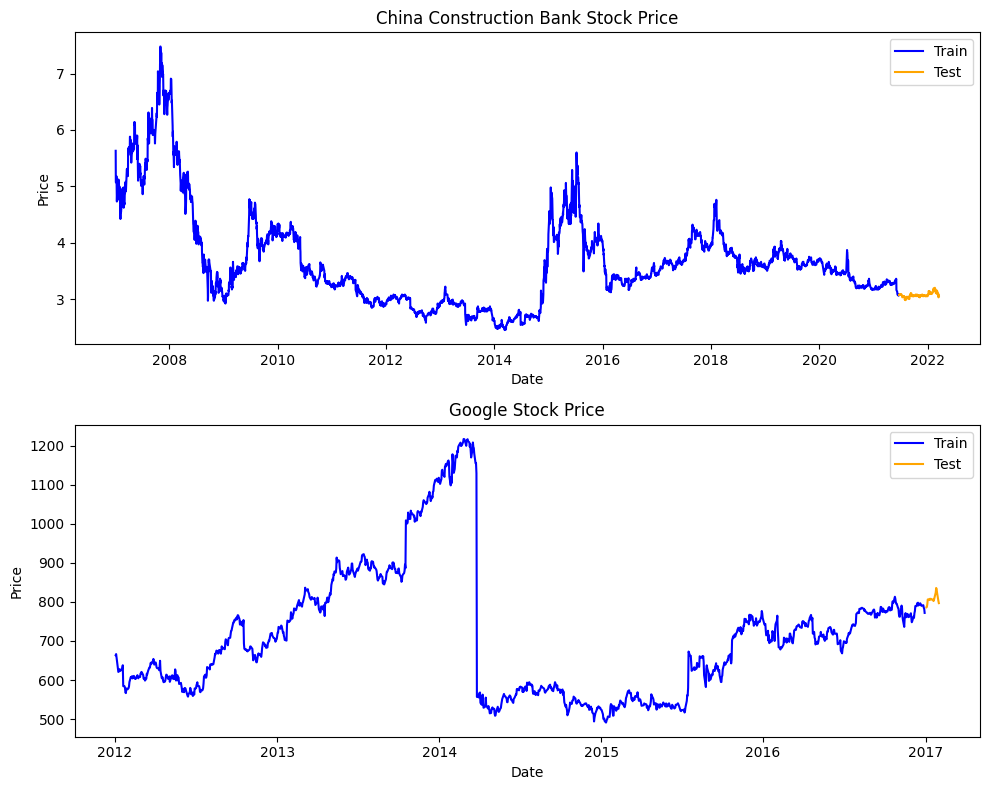

In [24]:
fig,ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].plot(ch_train.index, ch_train['close'], label='Train', color='blue')
ax[0].plot(ch_test.index, ch_test['close'], label='Test', color='orange')
ax[0].set_title('China Construction Bank Stock Price')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Price')
ax[0].legend()
ax[1].plot(google_train.index, google_train['Close'], label='Train', color='blue')
ax[1].plot(google_test.index, google_test['Close'], label='Test', color='orange')
ax[1].set_title('Google Stock Price')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Price')
ax[1].legend()
plt.tight_layout()
plt.savefig('../img/stock_prices.png')


/tmp/ipykernel_1630/2096056328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ch_train['diff_1'] = ch_train['close'].diff(1)
/tmp/ipykernel_1630/2096056328.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ch_train['diff_2'] = ch_train['close'].diff(2)


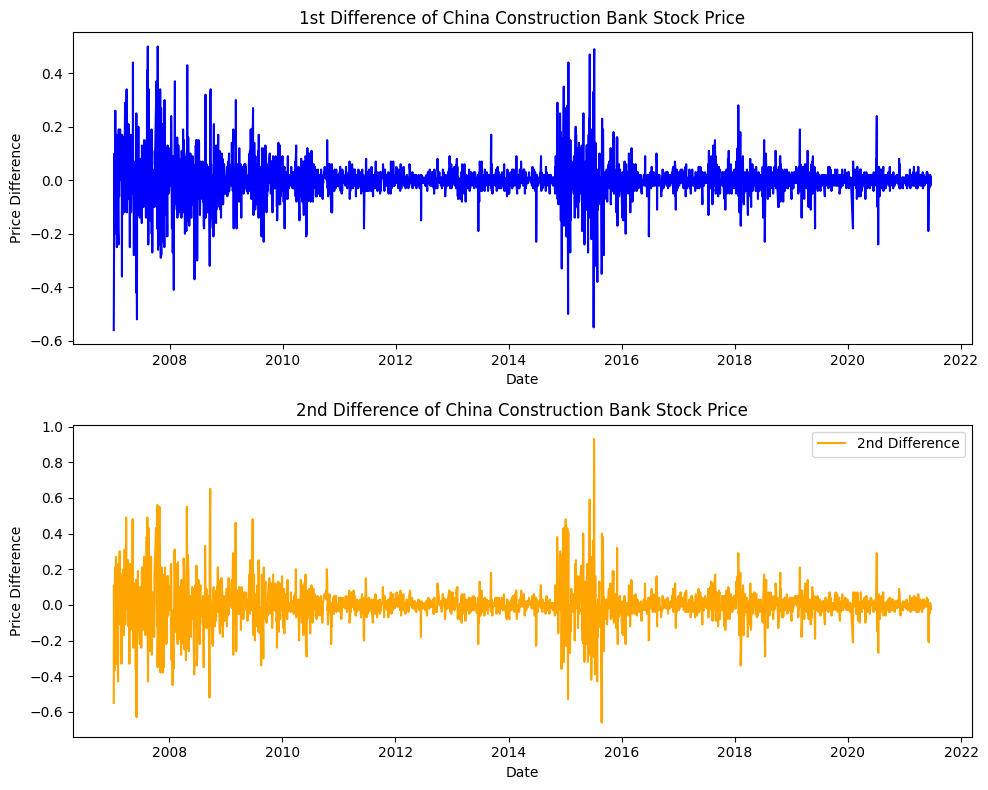

In [25]:
ch_train['diff_1'] = ch_train['close'].diff(1)
ch_train['diff_2'] = ch_train['close'].diff(2)
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].plot(ch_train.index, ch_train['diff_1'], label='1st Difference', color='blue')
ax[0].set_title('1st Difference of China Construction Bank Stock Price')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Price Difference')
ax[1].plot(ch_train.index, ch_train['diff_2'], label='2nd Difference', color='orange')
ax[1].set_title('2nd Difference of China Construction Bank Stock Price')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Price Difference')
ax[1].legend()
plt.tight_layout()
plt.savefig('../img/ch_diff.png')

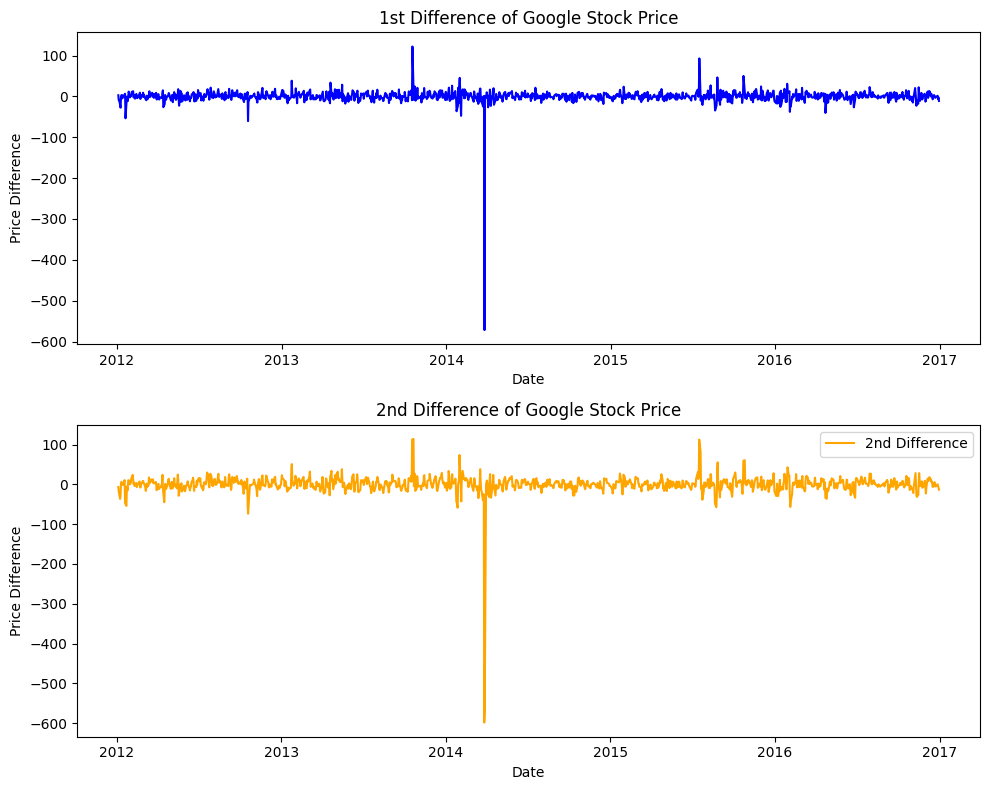

In [26]:
google_train['diff_1'] = google_train['Close'].diff(1)
google_train['diff_2'] = google_train['Close'].diff(2)
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].plot(google_train.index, google_train['diff_1'], label='1st Difference', color='blue')
ax[0].set_title('1st Difference of Google Stock Price')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Price Difference')
ax[1].plot(google_train.index, google_train['diff_2'], label='2nd Difference', color='orange')
ax[1].set_title('2nd Difference of Google Stock Price')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Price Difference')
ax[1].legend()
plt.tight_layout()
plt.savefig('../img/google_diff.png')

In [27]:
# order=(p,d,q)
google_model= ARIMA(endog=google_train['Close'], order=(2, 1, 0)).fit()
ch_model = ARIMA(endog=ch_train['close'], order=(2, 1, 0)).fit()

/home/ituki/Attention_based_CNN_LSTM_XGBoost_hybrid_model/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ituki/Attention_based_CNN_LSTM_XGBoost_hybrid_model/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ituki/Attention_based_CNN_LSTM_XGBoost_hybrid_model/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ituki/Attention_based_CNN_LSTM_XGBoost_hybrid_model/.venv/lib/python3.10/site-package

In [30]:
history_ch = [x for x in ch_train['close']]
print('histry_ch', type(history_ch),history_ch)
predictions_ch = list()
for i in range(ch_test.shape[0]):
    model = ARIMA(history_ch, order=(2, 1, 0))
    model_fit = model.fit()
    yhat = model_fit.forecast()
    yhat = float(yhat[0])
    predictions_ch.append(yhat)
    history_ch.append(ch_test['close'].iloc[i])
    print(f"{i +1} : Predicted={yhat:.3f}, Expected={ch_test['close'].iloc[i]:.3f}")
predictions1_ch = {
    'trade_date': ch_test.index[:],
    'close' : predictions_ch
}
predictions1_ch = pd.DataFrame(predictions1_ch)
predictions1_ch = predictions1_ch.set_index('trade_date',drop=True)
predictions1_ch.to_csv('../data/processed/ARIMA_ch.csv')

histry_ch <class 'list'> [5.63, 5.07, 5.08, 5.18, 5.1, 4.93, 4.73, 4.99, 4.94, 4.88, 4.76, 4.85, 5.02, 5.12, 5.04, 4.79, 4.85, 5.0, 4.96, 4.96, 4.85, 4.66, 4.42, 4.61, 4.65, 4.6, 4.54, 4.64, 4.64, 4.75, 4.94, 4.95, 4.98, 4.62, 4.79, 4.66, 4.71, 4.68, 4.84, 4.86, 4.88, 5.04, 5.08, 5.03, 4.91, 4.98, 5.0, 5.29, 5.29, 5.31, 5.24, 5.2, 5.22, 5.18, 5.33, 5.67, 5.55, 5.65, 5.69, 5.63, 5.69, 5.63, 5.67, 5.88, 5.88, 5.83, 5.76, 5.82, 5.75, 5.67, 5.42, 5.52, 5.65, 5.59, 5.76, 5.74, 5.62, 5.62, 5.66, 6.1, 6.14, 6.09, 6.13, 5.85, 5.9, 5.91, 5.81, 5.75, 5.76, 5.83, 5.88, 5.8, 5.84, 5.9, 5.48, 5.73, 5.62, 5.1, 5.19, 5.17, 5.2, 5.16, 5.21, 5.2, 5.4, 5.27, 5.29, 5.36, 5.35, 5.22, 5.23, 5.09, 5.01, 5.03, 5.11, 5.01, 5.02, 5.05, 5.1, 5.02, 4.86, 4.99, 5.07, 5.1, 5.18, 5.17, 5.13, 5.03, 5.13, 5.16, 5.14, 5.29, 5.41, 5.36, 5.49, 5.46, 5.4, 5.46, 5.43, 5.29, 5.31, 5.46, 5.47, 5.44, 5.85, 5.82, 5.81, 6.31, 6.2, 6.19, 5.95, 5.76, 6.1, 6.19, 6.09, 6.1, 6.16, 6.2, 6.09, 5.94, 6.02, 6.04, 6.11, 6.12, 6.2, 6.39,

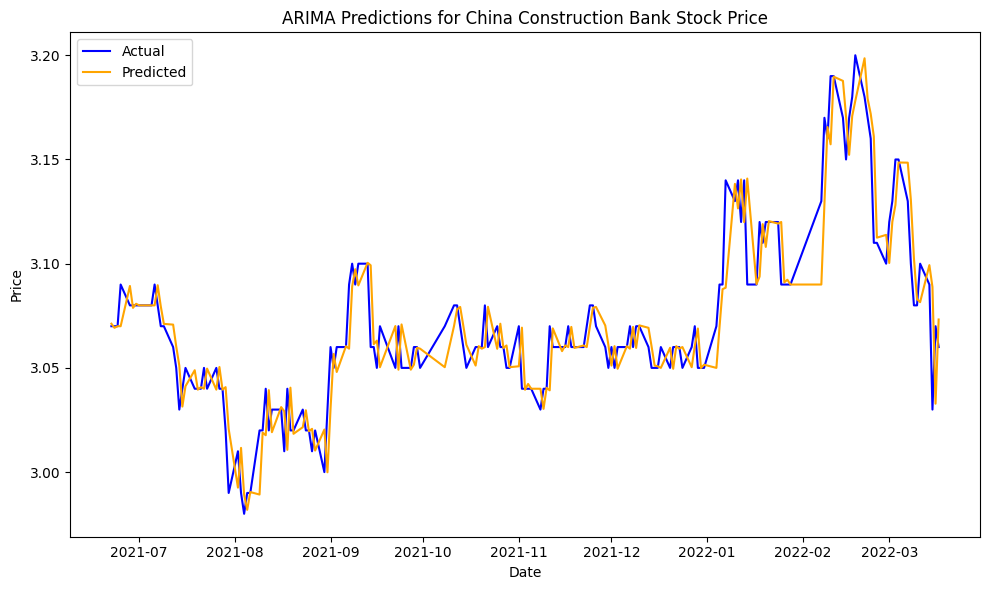

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(ch_test.index, ch_test['close'], label='Actual', color='blue')
plt.plot(predictions1_ch.index, predictions1_ch['close'], label='Predicted', color='orange')
plt.title('ARIMA Predictions for China Construction Bank Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.savefig('../img/ch_arima_pred.png')


In [ ]:
history_ch = [x for x in ch_train['close']]
print('histry_ch', type(history_ch),history_ch)
predictions_ch = list()
for i in range(ch_test.shape[0]):
    model = ARIMA(history_ch, order=(2, 1, 0))
    model_fit = model.fit()
    yhat = model_fit.forecast()
    yhat = float(yhat[0])
    predictions_ch.append(yhat)
    history_ch.append(ch_test['close'].iloc[i])
    print(f"{i +1} : Predicted={yhat:.3f}, Expected={ch_test['close'].iloc[i]:.3f}")
predictions1_ch = {
    'trade_date': ch_test.index[:],
    'close' : predictions_ch
}
predictions1_ch = pd.DataFrame(predictions1_ch)
predictions1_ch = predictions1_ch.set_index('trade_date',drop=True)
predictions1_ch.to_csv('../data/processed/ARIMA_ch.csv')